Begin by importing all necessary libraries.

In [1]:
import math
import pandas as pd
import numpy as np
%matplotlib inline

Then import all data files.

In [2]:
demo_ref = pd.read_csv('demographicref.csv') #demographic reference data
econ_ref = pd.read_csv('econref.csv') #economic reference data
health_expen = pd.read_csv('healthexpenditure.csv') #healthcare expenditure data
health_qual = pd.read_csv('healthquality.csv') #healthcare quality data
health_resor = pd.read_csv('healthresources.csv') #healthcare resources data
health_util = pd.read_csv('healthutil.csv') #healthcare utilization data
social_proc = pd.read_csv('socialprotection.csv') #social healthcare protection data
worker_migr = pd.read_csv('healthworkmigration.csv') #healthcare worker migration data

The final dataset cannot be loaded past the 284,614th line, so in order to avoid having partial data on one variable we needed to cut the last 40,000 or so entries.

In [3]:
health_stat = pd.read_csv('healthstatus.csv',nrows = 284583) #health status data

Remove unwanted columns of data.

In [4]:
demo_ref = demo_ref[['Variable','Measure','Country','Year','Value']]
econ_ref = econ_ref[['Variable', 'Measure', 'Country','Year', 'Value']]
health_expen = health_expen[['Financing scheme', 'Function','Provider', 'Measure', 'Country', 'Year', 'Unit', 'Value']]
health_qual = health_qual[['Country','Periods','Indicator','Gender','Age Group','Value','Value.1']]
health_resor = health_resor[['Variable','Measure','Country','Year','Value']]
health_util = health_util[['Variable','Measure','Country','Year','Value']]
social_proc = social_proc[['Variable','Measure','Country','Year','Value']]
worker_migr = worker_migr[['Country','Variable','Country of origin','Year','Value']]
health_stat = health_stat[['Variable','Measure','Country','Year','Value']]

Remove unwanted rows of data. Typically rows containing data measured in units that cannot be compared between countries (e.g. in local currency or raw numbers of incidents). Also removing rows containing variables with few observations or which are unlikely to be helpful for our purposes. Not all data sets required this.

In [5]:
econ_ref = econ_ref.loc[(econ_ref['Measure']=='Price index (2015=100)')|
                       (econ_ref['Measure']=='/capita, US$ purchasing power parity')|
                       (econ_ref['Measure']=='Current prices in NCU')]

health_expen = health_expen.loc[health_expen['Measure']=='Share of gross domestic product']

health_qual = health_qual.loc[((health_qual['Value']=='Age-sex standardised rate per 100 000 population')|
               (health_qual['Value']=='Age-sex standardised rate per 100 patients')|
               (health_qual['Value']=='Age-standardised survival (%) '))&
                (health_qual['Gender']=='Total')] 

health_resor = health_resor.loc[(health_resor['Measure']=='Density per 1 000 population (head counts)')|
                (health_resor['Measure']=='Per million population')|
                (health_resor['Measure']=='% of total physicians (head counts)')|
                (health_resor['Measure']=='Per 1 000 population')|
                (health_resor['Measure']=='% of physicians (head counts)')|
                (health_resor['Measure']=='Per 100 000 population')|
                (health_resor['Measure']=='% of total hospital employment (head counts)')|
                (health_resor['Measure']=='Per 1 000 live births')|
                (health_resor['Measure']=='Salaried, income, US$ exchange rate')] 

health_util = health_util.loc[(health_util['Measure']=='Per 100 000 population')|
               (health_util['Measure']=='% performed as inpatient cases')|
               (health_util['Measure']=='% performed as day cases')|
               (health_util['Measure']=='Per 100 000 females')|
               (health_util['Measure']=='Inpatient cases per 100 000 population ')|
               (health_util['Measure']=='Total procedures per 100 000 population')|
               (health_util['Measure']=='Day cases per 100 000 population')|
               (health_util['Measure']=='Per 1 000 population')]

social_proc = social_proc.loc[(social_proc['Measure']=='% of total population')|(social_proc['Measure']=='% of total population covered')] 

health_stat = health_stat.loc[(health_stat['Measure']=='Deaths per 100 000 females (standardised rates)')|
               (health_stat['Measure']=='Deaths per 100 000 females (crude rates)')|
               (health_stat['Measure']=='Years lost, /100 000 females, aged 75 years old')|
               (health_stat['Measure']=='Deaths per 100 000 males (standardised rates)')|
               (health_stat['Measure']=='Deaths per 100 000 population (standardised rates)')|
               (health_stat['Measure']=='Deaths per 100 000 males (crude rates)')|
               (health_stat['Measure']=='Years lost, /100 000 males, aged 75 years old')|
               (health_stat['Measure']=='Years lost, /100 000 population, aged 75 years old')|
               (health_stat['Measure']=='Deaths per 100 000 population (crude rates)')|
               (health_stat['Measure']=='% of population (crude rate)')|
               (health_stat['Measure']=='Years')]

Next we have to tidy the data.

In [6]:
demo_ref_pv = demo_ref.pivot_table(index = ['Country','Year'], columns = ['Variable','Measure'], values = 'Value')
econ_ref_pv = econ_ref.pivot_table(index = ['Country','Year'], columns = ['Variable','Measure'], values = 'Value')
health_expen_pv = health_expen.pivot_table(index = ['Country','Year'], columns = ['Function','Measure'], values = 'Value')
health_qual_pv = health_qual.pivot_table(index = ['Country','Periods','Age Group'], columns = ['Indicator','Value'], values = 'Value.1')
health_resor_pv = health_resor.pivot_table(index = ['Country','Year'], columns = ['Variable','Measure'], values = 'Value')
health_util_pv = health_util.pivot_table(index = ['Country','Year'], columns = ['Variable','Measure'], values = 'Value')
social_proc_pv = social_proc.pivot_table(index = ['Country','Year'], columns = ['Variable','Measure'], values = 'Value')
health_stat_pv = health_stat.pivot_table(index = ['Country','Year'], columns = ['Variable','Measure'], values = 'Value')

In [7]:
reference = pd.merge(demo_ref_pv,econ_ref_pv, on = ['Country','Year'])

In [8]:
reference 

Variable           Female population, incl. France Metropolitan + D.O.M. (overseas departments)  \
Measure                                                                   % of total population   
Country       Year                                                                                
Argentina     2010                                               51.1                             
              2011                                               51.1                             
              2012                                               51.1                             
              2013                                               51.0                             
              2014                                               51.0                             
...                                                               ...                             
United States 2018                                               50.8                             
              2019                                               50.8                             
              2020                                               50.5                             
              2021                                               50.5                             
              2022                                               50.7                             

Variable                                                      \
Measure            Female to male ratio Thousands of persons   
Country       Year                                             
Argentina     2010                104.5              20847.7   
              2011                104.5              21080.7   
              2012                104.4              21312.9   
              2013                104.3              21543.9   
              2014                104.2              21773.3   
...                                 ...                  ...   
United States 2018                103.1             165877.7   
              2019                103.1             166637.6   
              2020                101.9             167286.2   
              2021                101.9             167509.0   
              2022                102.9             171065.8   

Variable                                            Fertility  \
Measure            Children per women aged 15 to 49 years old   
Country       Year                                              
Argentina     2010                                       2.35   
              2011                                       2.34   
              2012                                       2.33   
              2013                                       2.32   
              2014                                       2.31   
...                                                       ...   
United States 2018                                       1.73   
              2019                                       1.71   
              2020                                       1.64   
              2021                                       1.66   
              2022                                        NaN   

Variable                                       Live births  \
Measure            Births, crude rate per 1 000 population   
Country       Year                                           
Argentina     2010                                     NaN   
              2011                                     NaN   
              2012                                     NaN   
              2013                                     NaN   
              2014                                     NaN   
...                                                    ...   
United States 2018                                    11.6   
              2019                                    11.4   
              2020                                    10.9   
              2021                                    11.0   

## Relationship Between Health Outcome and Migration of Healthcare Providers 
**Preliminary Analysis**

### Measures of Health Outcome

* Acute care outcome: \
Number of deaths in any hospital and out of hospital that occurred within 30 days of the admission date of the denominator cases.

In [9]:

ind = health_qual["Indicator"].str.contains("mortality")
val =  health_qual["Value"] == "Age-sex standardised rate per 100 patients"
health_qual['Periods'] = pd.to_numeric(health_qual['Periods'])
yrs =  health_qual["Periods"] > 2014

health_qual_2 = health_qual.loc[ind & val & yrs]

In [10]:
summary_qual = health_qual_2.groupby(['Country'])['Value.1'].mean()

In [11]:
summary_qual= pd.DataFrame(summary_qual).rename(columns={'Value.1': 'mortality_rate'})


<AxesSubplot: xlabel='Country'>

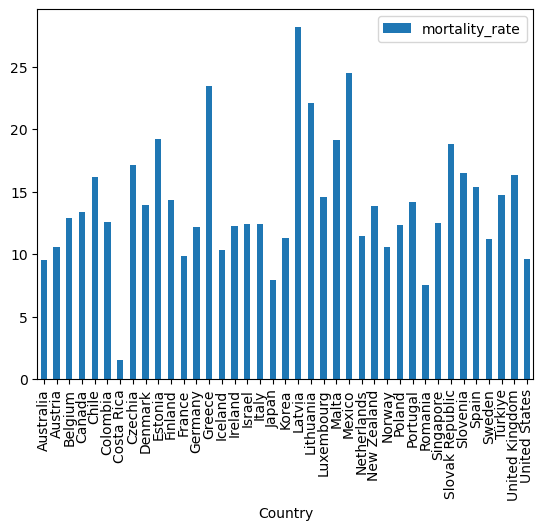

In [12]:
summary_qual.plot.bar()

### Health Workforce Migration

In [13]:
worker_migr

Country                                           Variable  \
0     Australia                            Total number of doctors   
1     Australia                            Total number of doctors   
2     Australia                            Total number of doctors   
3     Australia                            Total number of doctors   
4     Australia                            Total number of doctors   
...         ...                                                ...   
3809     France  of which native-born but foreign-trained (nurses)   
3810     France  of which native-born but foreign-trained (nurses)   
3811     France  of which native-born but foreign-trained (nurses)   
3812     France  of which native-born but foreign-trained (nurses)   
3813     France  of which native-born but foreign-trained (nurses)   

     Country of origin  Year    Value  
0                Total  2012  75258.0  
1                Total  2013  77974.0  
2                Total  2014  80968.0  
3                Total  2015  83490.0  
4                Total  2016  86550.0  
...                ...   ...      ...  
3809             Total  2017  10988.0  
3810             Total  2018  11428.0  
3811             Total  2019  11712.0  
3812             Total  2020  11987.0  
3813             Total  2021  12471.0  

[3814 rows x 5 columns]

In [14]:
imm_doc = (worker_migr["Variable"] == "Foreign-trained doctors - Annual inflow")
yrs2 = (worker_migr["Year"] > 2014)

In [15]:
worker_migr = worker_migr[imm_doc & yrs2]

In [16]:
summary_imm_doc = pd.DataFrame (worker_migr.groupby(['Country'])['Value'].mean())

In [17]:
summary_imm_doc.plot.bar()

<AxesSubplot: xlabel='Country'>

In [18]:
doc_mor = pd.merge(summary_qual,summary_imm_doc, on = ['Country'])
doc_mor

mortality_rate        Value
Country                                    
Australia             9.522222  2649.142857
Austria              10.557143   231.875000
Belgium              12.883333   535.875000
Canada               13.335714  2884.571429
Chile                16.173333  1349.250000
Colombia             12.605556   567.142857
Costa Rica            1.566667    30.833333
Czechia              17.161905   206.500000
Denmark              13.923810   267.857143
Estonia              19.176190    17.875000
Finland              14.321429   220.142857
France                9.833333  1221.142857
Germany              12.150000  1354.142857
Greece               23.450000   336.857143
Iceland              10.350000    54.666667
Ireland              12.225000  1546.000000
Israel               12.395238  1022.500000
Italy                12.416667   210.750000
Korea                11.264286    17.142857
Latvia               28.156250     4.714286
Lithuania            22.112500    11.000000
Netherlands          11.461905   212.285714
New Zealand          13.868750   861.125000
Norway               10.578571  1213.142857
Poland               12.331818   333.142857
Portugal             14.181250   342.500000
Slovenia             16.502381    58.750000
Spain                15.388095  3883.125000
Sweden               11.197619   748.333333
Türkiye              14.741667     0.000000
United Kingdom       16.311111  8362.714286
United States         9.586667  7301.571429

In [19]:
doc_mor['mortality_rate'].corr(doc_mor['Value'])

-0.10023221911783463